1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_networks import NeuralNetwork
from neural_networks_pytorch import NeuralNetworkPytorch
import pandas as pd
import time
import itertools
import torch.nn as nn
from metrics import one_hot, cross_entropy, accuracy
from IPython.display import display


X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")


Examino el dataset


In [4]:
print("Shape de X_images:", X_images.shape)
print("Shape de y_images:", y_images.shape)
print("Cantidad de clases:", len(np.unique(y_images)))


Shape de X_images: (5000, 784)
Shape de y_images: (5000,)
Cantidad de clases: 49


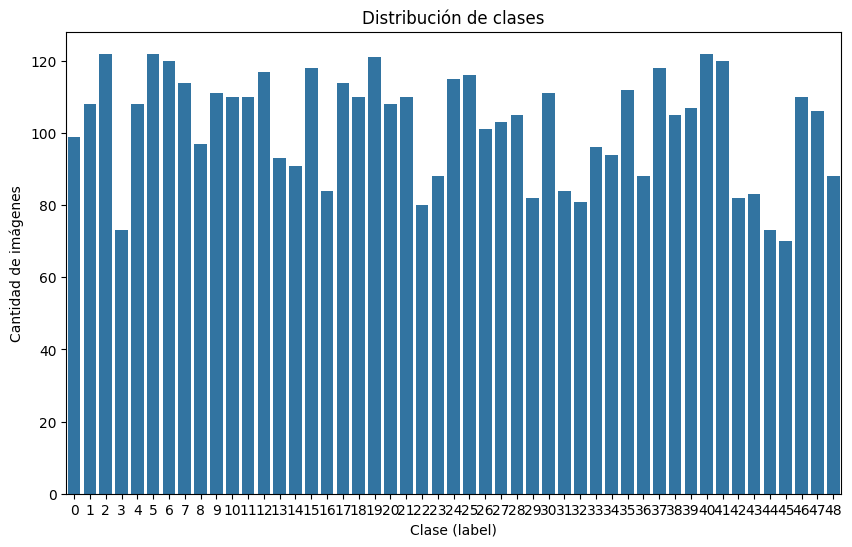

In [5]:
#grafica mas espaciado
plt.figure(figsize=(10, 6))
sns.countplot(x=y_images)
plt.title("Distribución de clases")
plt.xlabel("Clase (label)")
plt.ylabel("Cantidad de imágenes")
plt.show()

In [6]:
print("Valor mínimo en los píxeles:", X_images.min())
print("Valor máximo en los píxeles:", X_images.max())


Valor mínimo en los píxeles: 0.0
Valor máximo en los píxeles: 255.0


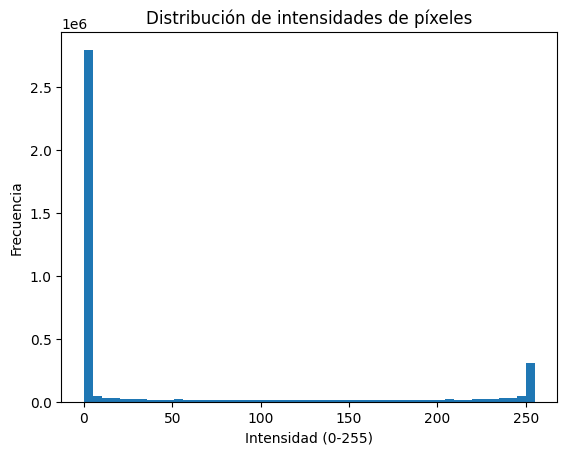

In [7]:
plt.hist(X_images.flatten(), bins=50)
plt.title("Distribución de intensidades de píxeles")
plt.xlabel("Intensidad (0-255)")
plt.ylabel("Frecuencia")
plt.show()


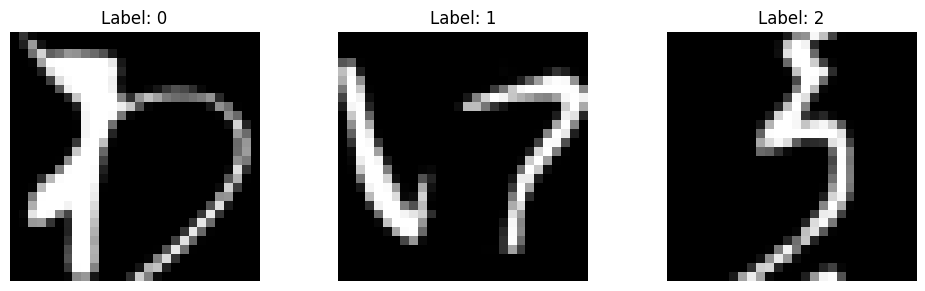

In [9]:

indices = []
for label in range(3):
    index = np.where(y_images == label)[0][0]
    indices.append(index)


plt.figure(figsize=(10, 3))
for i, idx in enumerate(indices):
    img = X_images[idx].reshape(28, 28)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()





In [ ]:
#analizar valores faltantes en el dataset




X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")


df = pd.DataFrame(X_images.reshape(X_images.shape[0], -1))
df['label'] = y_images

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Valores faltantes en el dataset:")
print(missing_values)



Valores faltantes en el dataset:
Series([], dtype: int64)


In [ ]:

# Cargar los datos
X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")

# Calcular cantidades para cada conjunto
n_total = X_images.shape[0]
n_train = int(n_total * 0.6)
n_val = int(n_total * 0.2)
n_test = n_total - n_train - n_val  

# Mezclar los índices aleatoriamente 
np.random.seed(42)
indices = np.random.permutation(n_total)

# Dividir los índices
train_idx = indices[:n_train]
val_idx = indices[n_train:n_train + n_val]
test_idx = indices[n_train + n_val:]

# Crear los conjuntos a partir de los índices
X_train = X_images[train_idx] / 255.0
y_train = y_images[train_idx]

X_val = X_images[val_idx] / 255.0
y_val = y_images[val_idx]

X_test = X_images[test_idx] / 255.0
y_test = y_images[test_idx]

# Verificación
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

# Guardar los conjuntos
np.save("data/X_train.npy", X_train)
np.save("data/y_train.npy", y_train)
np.save("data/X_val.npy", X_val)
np.save("data/y_val.npy", y_val)
np.save("data/X_test.npy", X_test)
np.save("data/y_test.npy", y_test)


Train: (3000, 784)
Validation: (1000, 784)
Test: (1000, 784)


2)

Época 1/500 - lr: 0.10000 - Train Loss: 3.9503 - Val Loss: 3.9484 - Val Acc: 0.0290
Época 101/500 - lr: 0.10000 - Train Loss: 2.0019 - Val Loss: 2.2944 - Val Acc: 0.4470
Época 201/500 - lr: 0.10000 - Train Loss: 1.2808 - Val Loss: 1.8054 - Val Acc: 0.5450
Época 301/500 - lr: 0.10000 - Train Loss: 0.9487 - Val Loss: 1.7008 - Val Acc: 0.5770
Época 401/500 - lr: 0.10000 - Train Loss: 0.7246 - Val Loss: 1.6868 - Val Acc: 0.5820
Época 500/500 - lr: 0.10000 - Train Loss: 0.5545 - Val Loss: 1.6954 - Val Acc: 0.5840


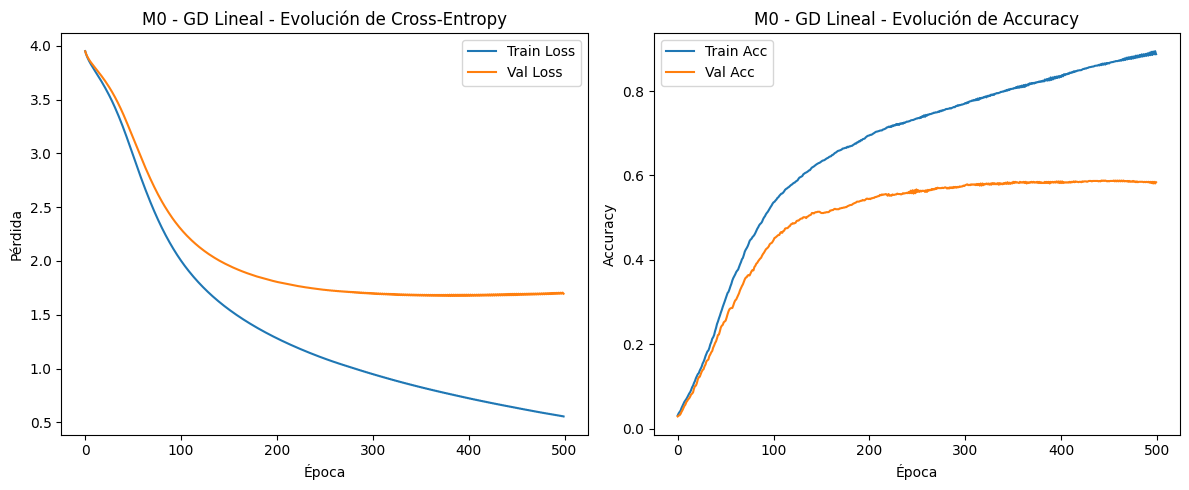

Tiempo de entrenamiento: 8.5 segundos

Métricas finales para Train:
Accuracy: 0.8873
Cross-Entropy Loss: 0.5545
Matriz de Confusión (Train):


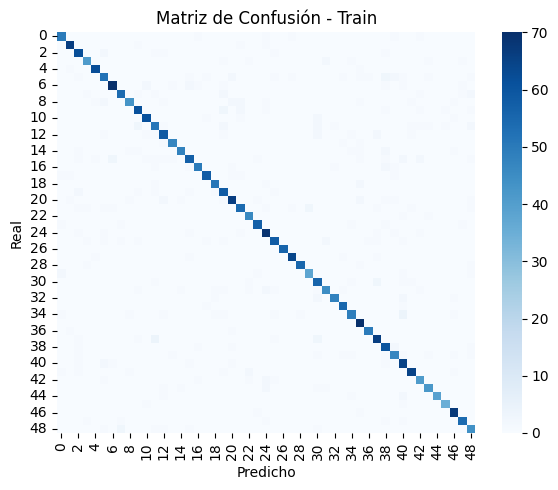


Métricas finales para Validation:
Accuracy: 0.5840
Cross-Entropy Loss: 1.6954
Matriz de Confusión (Validation):


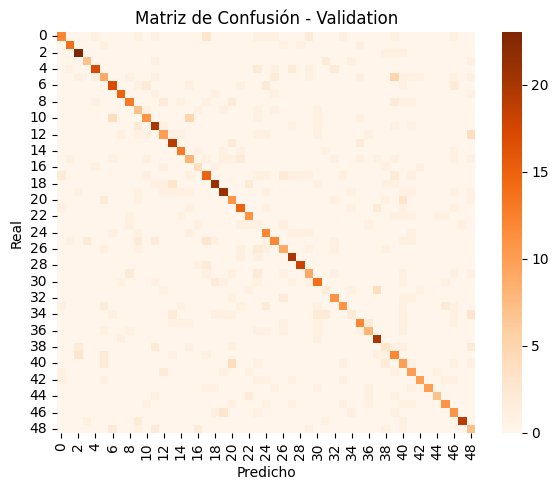

In [ ]:
# Instanciar la red
m0 = NeuralNetwork()

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")



time_start = time.time()
m0.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.1,  
)
time_end = time.time()

m0.plot_training_history(m0.history, nombre_modelo="M0 - GD Lineal")



tiempo_entrenamiento = round(time_end - time_start, 2)
print(f"Tiempo de entrenamiento: {tiempo_entrenamiento} segundos")
m0.report_final_metrics(X_train, y_train, set_name="Train")
m0.report_final_metrics(X_val, y_val, set_name="Validation")

3)

In [ ]:
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

lr_values = [1,0.1, 0.01, 0.001,0.0001]

results = []

for lr in lr_values:
    # Instanciar la red
    model = NeuralNetwork()


    time_start = time.time()
    model.train_model(
        X_train, y_train, X_val, y_val,
        layer_sizes=[784, 100, 80, 49],
        epochs=500,
        lr_init=lr,
    )
    time_end = time.time()
    duration = round(time_end - time_start, 2)

    y_train_oh = one_hot(y_train, 49)
    y_val_oh = one_hot(y_val, 49)

    y_train_pred, _ = model.forward(X_train)
    y_val_pred, _ = model.forward(X_val)

    loss_train = cross_entropy(y_train_oh, y_train_pred)
    loss_val = cross_entropy(y_val_oh, y_val_pred)

    acc_train = accuracy(y_train_oh, y_train_pred)
    acc_val = accuracy(y_val_oh, y_val_pred)

    results.append({
        "lr_init": lr,
        "train_loss": round(loss_train, 4),
        "val_loss": round(loss_val, 4),
        "train_acc": round(acc_train, 4),
        "val_acc": round(acc_val, 4),
        "tiempo (s)": duration
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)


Época 1/500 - lr: 1.00000 - Train Loss: 3.8354 - Val Loss: 3.8520 - Val Acc: 0.0340
Época 101/500 - lr: 1.00000 - Train Loss: 0.6165 - Val Loss: 1.7207 - Val Acc: 0.5710
Época 201/500 - lr: 1.00000 - Train Loss: 0.0527 - Val Loss: 1.8015 - Val Acc: 0.6420
Época 301/500 - lr: 1.00000 - Train Loss: 0.0182 - Val Loss: 2.0042 - Val Acc: 0.6380
Época 401/500 - lr: 1.00000 - Train Loss: 0.0101 - Val Loss: 2.1224 - Val Acc: 0.6400
Época 500/500 - lr: 1.00000 - Train Loss: 0.0067 - Val Loss: 2.2041 - Val Acc: 0.6370
Época 1/500 - lr: 0.10000 - Train Loss: 4.0303 - Val Loss: 4.0302 - Val Acc: 0.0170
Época 101/500 - lr: 0.10000 - Train Loss: 2.2185 - Val Loss: 2.4782 - Val Acc: 0.4190
Época 201/500 - lr: 0.10000 - Train Loss: 1.4004 - Val Loss: 1.8932 - Val Acc: 0.5460
Época 301/500 - lr: 0.10000 - Train Loss: 1.0361 - Val Loss: 1.7483 - Val Acc: 0.5720
Época 401/500 - lr: 0.10000 - Train Loss: 0.7883 - Val Loss: 1.7042 - Val Acc: 0.5800
Época 500/500 - lr: 0.10000 - Train Loss: 0.6067 - Val Los

,lr_init,train_loss,val_loss,train_acc,val_acc,tiempo (s)
1,0.1000,0.6067,1.7156,0.8783,0.581,8.41
0,1.0000,0.0067,2.2041,1.0000,0.637,8.59
2,0.0100,2.9809,3.1126,0.3043,0.269,8.59
3,0.0010,3.8384,3.8547,0.0627,0.055,8.39
4,0.0001,4.0187,3.9906,0.0180,0.014,8.91


Evaluo mejor lr para decay lineal


Época 1/500 - lr: 0.10000 - Train Loss: 3.9713 - Val Loss: 3.9831 - Val Acc: 0.0170
Época 101/500 - lr: 0.08000 - Train Loss: 1.9551 - Val Loss: 2.2718 - Val Acc: 0.4500
Época 201/500 - lr: 0.06000 - Train Loss: 1.3840 - Val Loss: 1.8720 - Val Acc: 0.5280
Época 301/500 - lr: 0.04000 - Train Loss: 1.1640 - Val Loss: 1.7633 - Val Acc: 0.5420
Época 401/500 - lr: 0.02000 - Train Loss: 1.0610 - Val Loss: 1.7246 - Val Acc: 0.5550
Época 500/500 - lr: 0.00020 - Train Loss: 1.0300 - Val Loss: 1.7145 - Val Acc: 0.5560
Tiempo de entrenamiento: 9.25 segundos


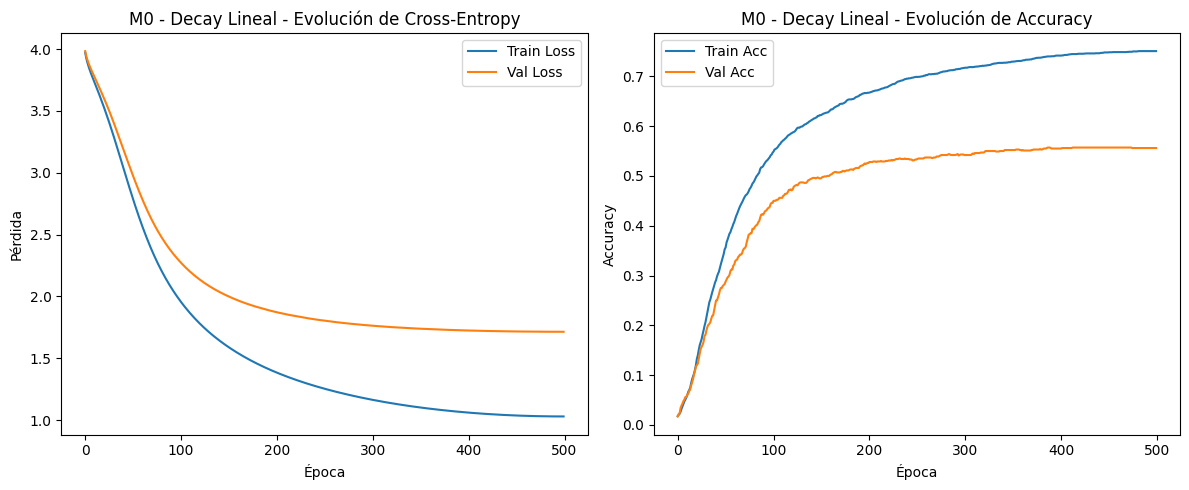


Entrenando con lr_init = 1
Época 1/500 - lr: 1.00000 - Train Loss: 3.8281 - Val Loss: 3.8428 - Val Acc: 0.0450
Época 101/500 - lr: 0.80000 - Train Loss: 0.6139 - Val Loss: 1.6494 - Val Acc: 0.5830
Época 201/500 - lr: 0.60000 - Train Loss: 0.0999 - Val Loss: 1.7043 - Val Acc: 0.6390
Época 301/500 - lr: 0.40000 - Train Loss: 0.0450 - Val Loss: 1.8590 - Val Acc: 0.6350
Época 401/500 - lr: 0.20000 - Train Loss: 0.0316 - Val Loss: 1.9301 - Val Acc: 0.6330
Época 500/500 - lr: 0.00200 - Train Loss: 0.0285 - Val Loss: 1.9508 - Val Acc: 0.6350

Entrenando con lr_init = 0.1
Época 1/500 - lr: 0.10000 - Train Loss: 4.0053 - Val Loss: 3.9699 - Val Acc: 0.0270
Época 101/500 - lr: 0.08000 - Train Loss: 2.1361 - Val Loss: 2.4060 - Val Acc: 0.4290
Época 201/500 - lr: 0.06000 - Train Loss: 1.4980 - Val Loss: 1.9468 - Val Acc: 0.5030
Época 301/500 - lr: 0.04000 - Train Loss: 1.2519 - Val Loss: 1.8208 - Val Acc: 0.5400
Época 401/500 - lr: 0.02000 - Train Loss: 1.1381 - Val Loss: 1.7767 - Val Acc: 0.5490


,lr_init,train_loss,val_loss,train_acc,val_acc,tiempo (s)
1,0.1000,1.1043,1.7654,0.7387,0.550,8.63
0,1.0000,0.0285,1.9508,1.0000,0.635,8.67
2,0.0100,3.4958,3.5656,0.1480,0.133,8.71
3,0.0010,3.9123,3.9050,0.0253,0.038,8.83
4,0.0001,4.0430,4.0360,0.0213,0.020,8.77


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.1,
    use_lr_decay=True,
    decay_type="linear"
)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - Decay Lineal")




lr_values = [1,0.1, 0.01, 0.001, 0.0001]



results = []

epochs = 500
decay_type = "linear"

layer_sizes = [784, 100, 80, 49]

for lr_init in lr_values:
    print(f"\nEntrenando con lr_init = {lr_init}")
    model = NeuralNetwork()
    start_time = time.time()

    model.train_model(
        X_train, y_train, X_val, y_val,
        layer_sizes=layer_sizes,
        epochs=epochs,
        lr_init=lr_init,
        use_lr_decay=True,
        decay_type=decay_type
    )

    end_time = time.time()
    duration = round(end_time - start_time, 2)

    y_train_oh = one_hot(y_train, 49)
    y_val_oh = one_hot(y_val, 49)

    y_train_pred, _ = model.forward(X_train)
    y_val_pred, _ = model.forward(X_val)

    loss_train = cross_entropy(y_train_oh, y_train_pred)
    loss_val = cross_entropy(y_val_oh, y_val_pred)

    acc_train = accuracy(y_train_oh, y_train_pred)
    acc_val = accuracy(y_val_oh, y_val_pred)

    results.append({
        "lr_init": lr_init,
        "train_loss": round(loss_train, 4),
        "val_loss": round(loss_val, 4),
        "train_acc": round(acc_train, 4),
        "val_acc": round(acc_val, 4),
        "tiempo (s)": duration
    })

# Mostrar resultados
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)


Época 1/500 - lr: 0.10000 - Train Loss: 3.9793 - Val Loss: 3.9759 - Val Acc: 0.0380
Época 101/500 - lr: 0.01585 - Train Loss: 3.1261 - Val Loss: 3.2772 - Val Acc: 0.2260
Época 201/500 - lr: 0.00251 - Train Loss: 2.9654 - Val Loss: 3.1398 - Val Acc: 0.2550
Época 301/500 - lr: 0.00040 - Train Loss: 2.9396 - Val Loss: 3.1178 - Val Acc: 0.2570
Época 401/500 - lr: 0.00006 - Train Loss: 2.9355 - Val Loss: 3.1143 - Val Acc: 0.2590
Época 500/500 - lr: 0.00001 - Train Loss: 2.9349 - Val Loss: 3.1137 - Val Acc: 0.2590
Tiempo de entrenamiento: 8.62 segundos


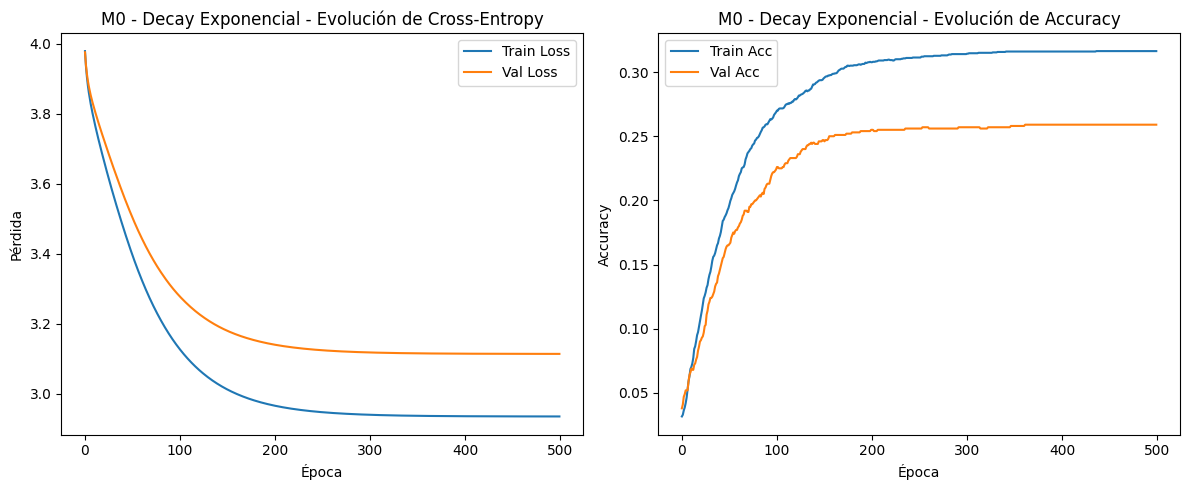


Entrenando con lr_init = 1
Época 1/500 - lr: 1.00000 - Train Loss: 3.8253 - Val Loss: 3.8494 - Val Acc: 0.0370
Época 101/500 - lr: 0.10000 - Train Loss: 0.9967 - Val Loss: 1.6440 - Val Acc: 0.5900
Época 201/500 - lr: 0.01000 - Train Loss: 0.8973 - Val Loss: 1.6199 - Val Acc: 0.5980
Época 301/500 - lr: 0.00100 - Train Loss: 0.8881 - Val Loss: 1.6180 - Val Acc: 0.5970
Época 401/500 - lr: 0.00010 - Train Loss: 0.8872 - Val Loss: 1.6178 - Val Acc: 0.5970
Época 500/500 - lr: 0.00001 - Train Loss: 0.8871 - Val Loss: 1.6178 - Val Acc: 0.5970

Entrenando con lr_init = 0.1
Época 1/500 - lr: 0.10000 - Train Loss: 3.9641 - Val Loss: 3.9787 - Val Acc: 0.0200
Época 101/500 - lr: 0.01585 - Train Loss: 3.0650 - Val Loss: 3.2272 - Val Acc: 0.2290
Época 201/500 - lr: 0.00251 - Train Loss: 2.8714 - Val Loss: 3.0617 - Val Acc: 0.2680
Época 301/500 - lr: 0.00040 - Train Loss: 2.8412 - Val Loss: 3.0352 - Val Acc: 0.2780
Época 401/500 - lr: 0.00006 - Train Loss: 2.8364 - Val Loss: 3.0311 - Val Acc: 0.2810


,lr_init,train_loss,val_loss,train_acc,val_acc,tiempo (s)
0,1.0000,0.8871,1.6178,0.7833,0.597,8.37
1,0.1000,2.8357,3.0304,0.3423,0.282,8.55
2,0.0100,3.8175,3.8494,0.0463,0.053,8.40
3,0.0010,4.0031,3.9999,0.0243,0.031,8.72
4,0.0001,4.0280,4.0391,0.0233,0.017,8.92


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.1,
    use_lr_decay=True,
    decay_type="exponential"
)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - Decay Exponencial")

lr_values = [1,0.1, 0.01, 0.001, 0.0001]


results = []

epochs = 500
decay_type = "exponential"

layer_sizes = [784, 100, 80, 49]

for lr_init in lr_values:
    print(f"\nEntrenando con lr_init = {lr_init}")
    model = NeuralNetwork()
    start_time = time.time()

    model.train_model(
        X_train, y_train, X_val, y_val,
        layer_sizes=layer_sizes,
        epochs=epochs,
        lr_init=lr_init,
        use_lr_decay=True,
        decay_type=decay_type
    )

    end_time = time.time()
    duration = round(end_time - start_time, 2)

    y_train_oh = one_hot(y_train, 49)
    y_val_oh = one_hot(y_val, 49)

    y_train_pred, _ = model.forward(X_train)
    y_val_pred, _ = model.forward(X_val)

    loss_train = cross_entropy(y_train_oh, y_train_pred)
    loss_val = cross_entropy(y_val_oh, y_val_pred)

    acc_train = accuracy(y_train_oh, y_train_pred)
    acc_val = accuracy(y_val_oh, y_val_pred)

    results.append({
        "lr_init": lr_init,
        "train_loss": round(loss_train, 4),
        "val_loss": round(loss_val, 4),
        "train_acc": round(acc_train, 4),
        "val_acc": round(acc_val, 4),
        "tiempo (s)": duration
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)



Época 1/500 - lr: 0.01000 - Train Loss: 3.8349 - Val Loss: 3.8530 - Val Acc: 0.0450
Época 101/500 - lr: 0.01000 - Train Loss: 0.1790 - Val Loss: 1.8458 - Val Acc: 0.5960
Época 201/500 - lr: 0.01000 - Train Loss: 0.0336 - Val Loss: 2.2301 - Val Acc: 0.6000
Época 301/500 - lr: 0.01000 - Train Loss: 0.0148 - Val Loss: 2.4315 - Val Acc: 0.5970
Época 401/500 - lr: 0.01000 - Train Loss: 0.0089 - Val Loss: 2.5678 - Val Acc: 0.5970
Época 500/500 - lr: 0.01000 - Train Loss: 0.0062 - Val Loss: 2.6618 - Val Acc: 0.5970
Tiempo de entrenamiento: 12.57 segundos


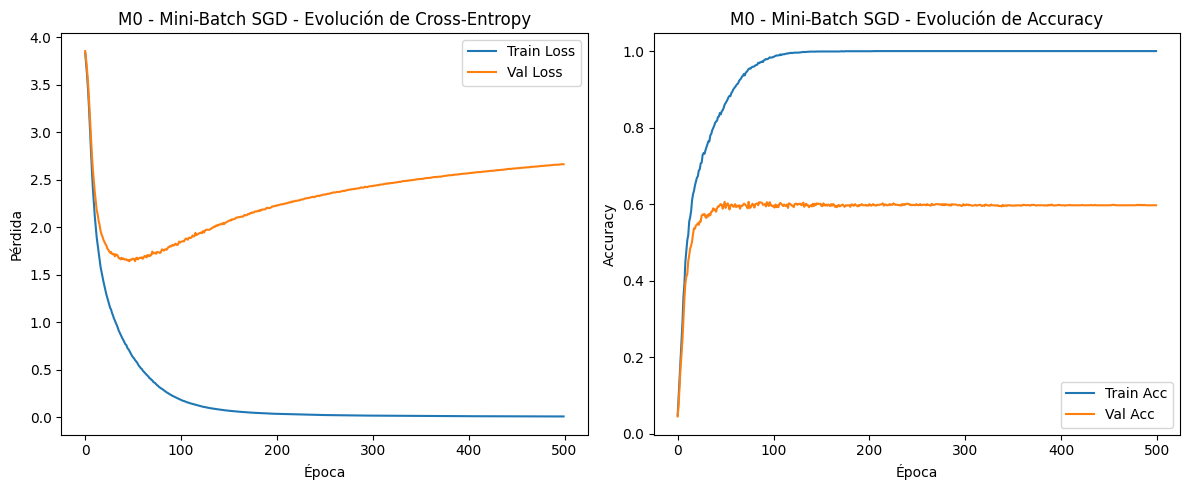


Entrenando con batch_size = 32 y lr_init = 1
Época 1/500 - lr: 1.00000 - Train Loss: 2.9190 - Val Loss: 3.0399 - Val Acc: 0.2400
Época 101/500 - lr: 1.00000 - Train Loss: 2.1671 - Val Loss: 4.1540 - Val Acc: 0.2700
Época 201/500 - lr: 1.00000 - Train Loss: 2.5561 - Val Loss: 3.9184 - Val Acc: 0.1930
Época 301/500 - lr: 1.00000 - Train Loss: 2.5668 - Val Loss: 4.0125 - Val Acc: 0.1860
Época 401/500 - lr: 1.00000 - Train Loss: 2.7898 - Val Loss: 3.9101 - Val Acc: 0.1580
Época 500/500 - lr: 1.00000 - Train Loss: 2.6694 - Val Loss: 4.0096 - Val Acc: 0.1760

Entrenando con batch_size = 32 y lr_init = 0.1
Época 1/500 - lr: 0.10000 - Train Loss: 2.5648 - Val Loss: 2.7905 - Val Acc: 0.3150
Época 101/500 - lr: 0.10000 - Train Loss: 0.0021 - Val Loss: 2.6043 - Val Acc: 0.6290
Época 201/500 - lr: 0.10000 - Train Loss: 0.0009 - Val Loss: 2.8252 - Val Acc: 0.6320
Época 301/500 - lr: 0.10000 - Train Loss: 0.0005 - Val Loss: 2.9495 - Val Acc: 0.6310
Época 401/500 - lr: 0.10000 - Train Loss: 0.0004 -

,batch_size,lr_init,train_loss,val_loss,train_acc,val_acc,tiempo (s)
3,32,0.0010,0.6377,1.6504,0.8700,0.576,12.27
22,512,0.0100,0.9845,1.6887,0.7673,0.558,9.06
17,256,0.0100,0.4457,1.7261,0.9217,0.601,8.98
8,64,0.0010,1.2062,1.8141,0.7077,0.541,10.29
12,128,0.0100,0.0965,1.9676,0.9960,0.592,9.20
13,128,0.0010,1.8940,2.2335,0.5663,0.460,8.99
7,64,0.0100,0.0207,2.3563,1.0000,0.600,10.11
21,512,0.1000,0.0131,2.6406,1.0000,0.592,9.03
20,512,1.0000,0.0005,2.7902,1.0000,0.637,8.96
2,32,0.0100,0.0061,2.8086,1.0000,0.589,12.23


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.01,
    batch_size=32

)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - Mini-Batch SGD")

results = []

learning_rates = [1,0.1, 0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128, 256, 512]

for batch_size in batch_sizes:
    for lr_init in learning_rates:
        print(f"\nEntrenando con batch_size = {batch_size} y lr_init = {lr_init}")
        model = NeuralNetwork()
        start_time = time.time()

        model.train_model(
            X_train, y_train, X_val, y_val,
            layer_sizes=[784, 100, 80, 49],
            epochs=500,
            lr_init=lr_init,
            batch_size=batch_size
        )

        end_time = time.time()
        duration = round(end_time - start_time, 2)

        y_train_oh = one_hot(y_train, 49)
        y_val_oh = one_hot(y_val, 49)

        y_train_pred, _ = model.forward(X_train)
        y_val_pred, _ = model.forward(X_val)

        loss_train = cross_entropy(y_train_oh, y_train_pred)
        loss_val = cross_entropy(y_val_oh, y_val_pred)

        acc_train = accuracy(y_train_oh, y_train_pred)
        acc_val = accuracy(y_val_oh, y_val_pred)

        results.append({
            "batch_size": batch_size,
            "lr_init": lr_init,
            "train_loss": round(loss_train, 4),
            "val_loss": round(loss_val, 4),
            "train_acc": round(acc_train, 4),
            "val_acc": round(acc_val, 4),
            "tiempo (s)": duration
        })
# Mostrar resultados
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)


Época 1/500 - lr: 0.01000 - Train Loss: 1.9370 - Val Loss: 2.2544 - Val Acc: 0.4000
Época 101/500 - lr: 0.01000 - Train Loss: 0.0975 - Val Loss: 8.9880 - Val Acc: 0.5680
Época 201/500 - lr: 0.01000 - Train Loss: 0.1493 - Val Loss: 10.4829 - Val Acc: 0.5820
Época 301/500 - lr: 0.01000 - Train Loss: 0.1779 - Val Loss: 11.7508 - Val Acc: 0.5580
Época 401/500 - lr: 0.01000 - Train Loss: 0.0868 - Val Loss: 11.3302 - Val Acc: 0.5780
Época 500/500 - lr: 0.01000 - Train Loss: 0.0000 - Val Loss: 11.4284 - Val Acc: 0.5780
Tiempo de entrenamiento: 24.3 segundos


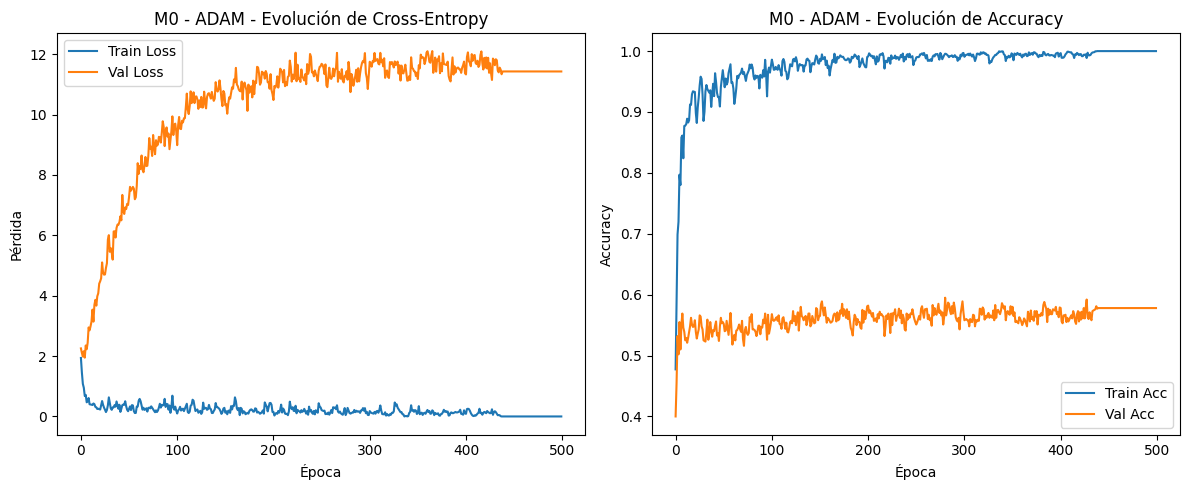


Entrenando Adam con lr_init = 1 y batch_size = 16
Época 1/500 - lr: 1.00000 - Train Loss: 4.3069 - Val Loss: 4.2519 - Val Acc: 0.0200
Época 101/500 - lr: 1.00000 - Train Loss: 4.3855 - Val Loss: 4.3341 - Val Acc: 0.0310
Época 201/500 - lr: 1.00000 - Train Loss: 4.1795 - Val Loss: 4.1779 - Val Acc: 0.0230
Época 301/500 - lr: 1.00000 - Train Loss: 4.3638 - Val Loss: 4.4252 - Val Acc: 0.0210
Época 401/500 - lr: 1.00000 - Train Loss: 4.3108 - Val Loss: 4.3894 - Val Acc: 0.0170
Época 500/500 - lr: 1.00000 - Train Loss: 4.3433 - Val Loss: 4.3211 - Val Acc: 0.0240

Entrenando Adam con lr_init = 1 y batch_size = 32
Época 1/500 - lr: 1.00000 - Train Loss: 4.1246 - Val Loss: 4.1540 - Val Acc: 0.0100
Época 101/500 - lr: 1.00000 - Train Loss: 4.1055 - Val Loss: 4.1520 - Val Acc: 0.0180
Época 201/500 - lr: 1.00000 - Train Loss: 4.1584 - Val Loss: 4.1438 - Val Acc: 0.0270
Época 301/500 - lr: 1.00000 - Train Loss: 4.1405 - Val Loss: 4.1239 - Val Acc: 0.0160
Época 401/500 - lr: 1.00000 - Train Loss: 

,lr_init,batch_size,train_loss,val_loss,train_acc,val_acc,tiempo (s)
34,0.0001,1024,0.3250,1.7070,0.9587,0.600,9.84
33,0.0001,512,0.1254,1.8708,0.9927,0.598,9.69
32,0.0001,256,0.0352,2.3277,0.9990,0.578,10.41
31,0.0001,128,0.0046,2.7679,1.0000,0.593,12.26
27,0.0010,1024,0.0014,2.9225,1.0000,0.600,10.14
26,0.0010,512,0.0005,3.0854,1.0000,0.603,9.76
25,0.0010,256,0.0001,3.4426,1.0000,0.625,10.34
10,0.1000,128,3.5652,3.6184,0.0523,0.040,11.82
9,0.1000,64,3.6098,3.6771,0.0547,0.048,16.78
6,1.0000,1024,3.8862,3.9012,0.0253,0.022,9.24


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.01,
    use_adam=True,
    batch_size=32
)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - ADAM")

learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64, 128, 256, 512, 1024]

results = []

for lr_init in learning_rates:
    for batch_size in batch_sizes:
        print(f"\nEntrenando Adam con lr_init = {lr_init} y batch_size = {batch_size}")
        model = NeuralNetwork()
        start_time = time.time()

        model.train_model(
            X_train, y_train, X_val, y_val,
            layer_sizes= [784, 100, 80, 49],
            epochs=500,
            lr_init=lr_init,
            use_adam=True,
            batch_size=batch_size
        )

        end_time = time.time()
        duration = round(end_time - start_time, 2)

        y_train_oh = one_hot(y_train, 49)
        y_val_oh = one_hot(y_val, 49)

        y_train_pred, _ = model.forward(X_train)
        y_val_pred, _ = model.forward(X_val)

        loss_train = cross_entropy(y_train_oh, y_train_pred)
        loss_val = cross_entropy(y_val_oh, y_val_pred)

        acc_train = accuracy(y_train_oh, y_train_pred)
        acc_val = accuracy(y_val_oh, y_val_pred)

        results.append({
            "lr_init": lr_init,
            "batch_size": batch_size,
            "train_loss": round(loss_train, 4),
            "val_loss": round(loss_val, 4),
            "train_acc": round(acc_train, 4),
            "val_acc": round(acc_val, 4),
            "tiempo (s)": duration
        })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)


Época 1/500 - lr: 0.10000 - Train Loss: 3.9567 - Val Loss: 3.9519 - Val Acc: 0.0180
Época 101/500 - lr: 0.10000 - Train Loss: 2.1470 - Val Loss: 2.4099 - Val Acc: 0.4450
Época 201/500 - lr: 0.10000 - Train Loss: 1.3670 - Val Loss: 1.9052 - Val Acc: 0.5320
Época 301/500 - lr: 0.10000 - Train Loss: 0.9981 - Val Loss: 1.7663 - Val Acc: 0.5600
Época 401/500 - lr: 0.10000 - Train Loss: 0.7577 - Val Loss: 1.7342 - Val Acc: 0.5810
Época 500/500 - lr: 0.10000 - Train Loss: 0.5810 - Val Loss: 1.7534 - Val Acc: 0.5780
Tiempo de entrenamiento: 8.53 segundos


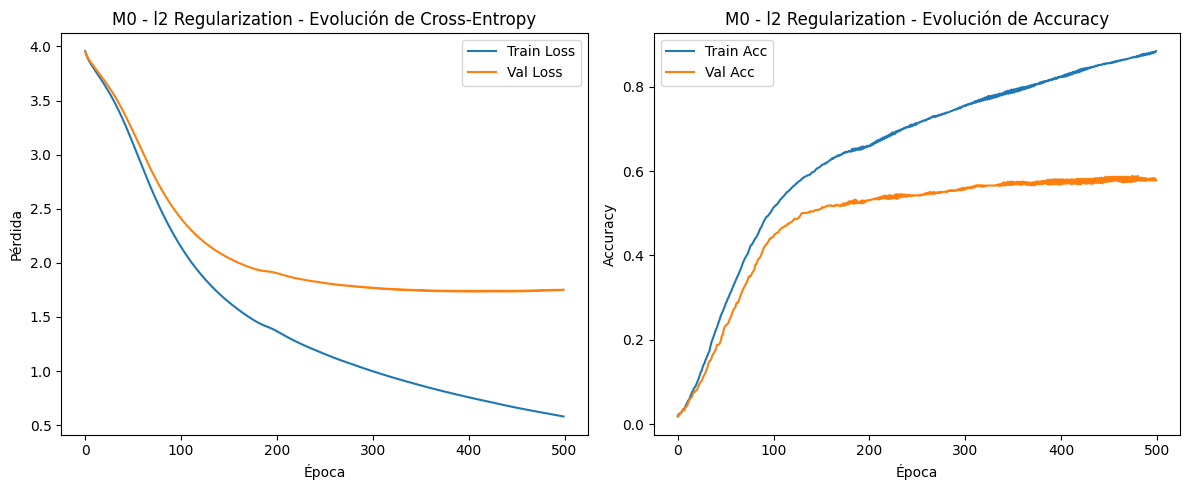


Entrenando con lambda_l2 = 0.1 y lr_init = 0.1
Época 1/500 - lr: 0.10000 - Train Loss: 4.0482 - Val Loss: 4.0428 - Val Acc: 0.0120
Época 101/500 - lr: 0.10000 - Train Loss: 2.1574 - Val Loss: 2.4094 - Val Acc: 0.4430
Época 201/500 - lr: 0.10000 - Train Loss: 1.3587 - Val Loss: 1.8647 - Val Acc: 0.5280
Época 301/500 - lr: 0.10000 - Train Loss: 0.9967 - Val Loss: 1.7245 - Val Acc: 0.5460
Época 401/500 - lr: 0.10000 - Train Loss: 0.7470 - Val Loss: 1.6865 - Val Acc: 0.5650
Época 500/500 - lr: 0.10000 - Train Loss: 0.5674 - Val Loss: 1.7021 - Val Acc: 0.5770

Entrenando con lambda_l2 = 0.1 y lr_init = 0.01
Época 1/500 - lr: 0.01000 - Train Loss: 4.0599 - Val Loss: 4.1022 - Val Acc: 0.0220
Época 101/500 - lr: 0.01000 - Train Loss: 3.7725 - Val Loss: 3.8188 - Val Acc: 0.0510
Época 201/500 - lr: 0.01000 - Train Loss: 3.6276 - Val Loss: 3.6972 - Val Acc: 0.1010
Época 301/500 - lr: 0.01000 - Train Loss: 3.4510 - Val Loss: 3.5474 - Val Acc: 0.1630
Época 401/500 - lr: 0.01000 - Train Loss: 3.238

,lambda_l2,lr_init,train_loss,val_loss,train_acc,val_acc,tiempo (s)
0,0.10000,0.1000,0.5674,1.7021,0.8893,0.577,8.45
12,0.00010,0.1000,0.5690,1.7212,0.8843,0.587,8.63
8,0.00100,0.1000,0.5633,1.7263,0.8857,0.587,8.59
16,0.00001,0.1000,0.6002,1.7288,0.8773,0.583,8.70
4,0.01000,0.1000,0.5914,1.7331,0.8800,0.579,8.54
5,0.01000,0.0100,2.9061,3.0416,0.3347,0.277,8.53
13,0.00010,0.0100,2.9845,3.0961,0.3163,0.282,8.59
17,0.00001,0.0100,3.0124,3.1395,0.3100,0.277,8.66
1,0.10000,0.0100,3.0037,3.1570,0.3120,0.258,8.46
9,0.00100,0.0100,3.0840,3.2167,0.3010,0.248,8.51


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.1,
    use_l2=True,
    lambda_l2=1e-3,
)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - l2 Regularization")

lr = [0.1, 0.01, 0.001, 0.0001]
lambda_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

results = []

epochs = 500

layer_sizes = [784, 100, 80, 49]

for lambda_l2 in lambda_values: 
    for lr_init in lr:
        print(f"\nEntrenando con lambda_l2 = {lambda_l2} y lr_init = {lr_init}")
        model = NeuralNetwork()
        start_time = time.time()

        model.train_model(
            X_train, y_train, X_val, y_val,
            layer_sizes=layer_sizes,
            epochs=epochs,
            lr_init=lr_init,
            use_l2=True,
            lambda_l2=lambda_l2
        )

        end_time = time.time()
        duration = round(end_time - start_time, 2)

        y_train_oh = one_hot(y_train, 49)
        y_val_oh = one_hot(y_val, 49)

        y_train_pred, _ = model.forward(X_train)
        y_val_pred, _ = model.forward(X_val)

        loss_train = cross_entropy(y_train_oh, y_train_pred)
        loss_val = cross_entropy(y_val_oh, y_val_pred)

        acc_train = accuracy(y_train_oh, y_train_pred)
        acc_val = accuracy(y_val_oh, y_val_pred)

        results.append({
            "lambda_l2": lambda_l2,
            "lr_init": lr_init,
            "train_loss": round(loss_train, 4),
            "val_loss": round(loss_val, 4),
            "train_acc": round(acc_train, 4),
            "val_acc": round(acc_val, 4),
            "tiempo (s)": duration
        })
# Mostrar resultados
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)

Época 1/500 - lr: 0.10000 - Train Loss: 3.9811 - Val Loss: 3.9763 - Val Acc: 0.0190
Época 101/500 - lr: 0.10000 - Train Loss: 2.1364 - Val Loss: 2.4320 - Val Acc: 0.4140
Época 201/500 - lr: 0.10000 - Train Loss: 1.3386 - Val Loss: 1.8576 - Val Acc: 0.5250
Época 301/500 - lr: 0.10000 - Train Loss: 0.9991 - Val Loss: 1.7438 - Val Acc: 0.5530
Early stopping en época 374
Tiempo de entrenamiento: 6.45 segundos


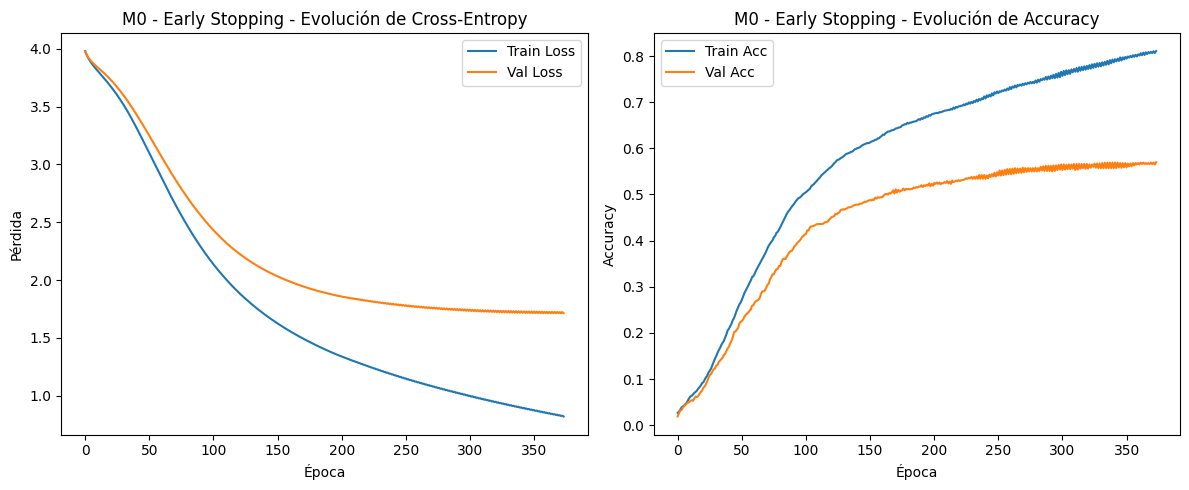


Entrenando con lr_init = 1 y patience = 10
Época 1/500 - lr: 1.00000 - Train Loss: 3.8381 - Val Loss: 3.8420 - Val Acc: 0.0420
Época 101/500 - lr: 1.00000 - Train Loss: 0.6833 - Val Loss: 1.7190 - Val Acc: 0.5640
Early stopping en época 103

Entrenando con lr_init = 0.1 y patience = 10
Época 1/500 - lr: 0.10000 - Train Loss: 4.0010 - Val Loss: 3.9797 - Val Acc: 0.0210
Época 101/500 - lr: 0.10000 - Train Loss: 1.9763 - Val Loss: 2.2834 - Val Acc: 0.4450
Época 201/500 - lr: 0.10000 - Train Loss: 1.2855 - Val Loss: 1.8351 - Val Acc: 0.5400
Época 301/500 - lr: 0.10000 - Train Loss: 0.9576 - Val Loss: 1.7158 - Val Acc: 0.5700
Época 401/500 - lr: 0.10000 - Train Loss: 0.7323 - Val Loss: 1.6786 - Val Acc: 0.5850
Early stopping en época 431

Entrenando con lr_init = 0.01 y patience = 10
Época 1/500 - lr: 0.01000 - Train Loss: 4.0222 - Val Loss: 3.9986 - Val Acc: 0.0140
Época 101/500 - lr: 0.01000 - Train Loss: 3.8143 - Val Loss: 3.8267 - Val Acc: 0.0400
Época 201/500 - lr: 0.01000 - Train Los

,lr_init,patience,train_loss,val_loss,train_acc,val_acc,tiempo (s)
15,1.0000,40,0.3877,1.4616,0.9130,0.620,2.53
20,1.0000,50,0.4016,1.4797,0.9103,0.619,2.87
10,1.0000,30,0.5156,1.5305,0.8767,0.609,2.21
5,1.0000,20,0.6754,1.5485,0.8347,0.588,1.79
0,1.0000,10,0.7055,1.5768,0.8097,0.583,1.78
6,0.1000,20,0.7539,1.6473,0.8260,0.578,7.02
11,0.1000,30,0.7271,1.6538,0.8367,0.598,7.58
1,0.1000,10,0.6942,1.6761,0.8503,0.586,7.37
21,0.1000,50,0.7383,1.7278,0.8310,0.574,7.73
16,0.1000,40,0.7111,1.7312,0.8413,0.575,7.77


In [ ]:

X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

model = NeuralNetwork()
time_start = time.time()
model.train_model(
    X_train, y_train, X_val, y_val,
    layer_sizes=[784, 100, 80, 49],
    epochs=500,
    lr_init=0.1,
    use_early_stopping=True,
    patience=10,
)
time_end = time.time()



print(f"Tiempo de entrenamiento: {round(time_end - time_start, 2)} segundos")
model.plot_training_history(model.history, nombre_modelo="M0 - Early Stopping")

lr = [1,0.1, 0.01, 0.001,0.0001]
patiences= [10,20,30,40,50]
results = []

for patience in patiences:
    for lr_init in lr:
        print(f"\nEntrenando con lr_init = {lr_init} y patience = {patience}")
        model = NeuralNetwork()
        start_time = time.time()

        model.train_model(
            X_train, y_train, X_val, y_val,
            layer_sizes=[784, 100, 80, 49],
            epochs=500,
            lr_init=lr_init,
            use_early_stopping=True,
            patience=patience
        )

        end_time = time.time()
        duration = round(end_time - start_time, 2)

        y_train_oh = one_hot(y_train, 49)
        y_val_oh = one_hot(y_val, 49)

        y_train_pred, _ = model.forward(X_train)
        y_val_pred, _ = model.forward(X_val)

        loss_train = cross_entropy(y_train_oh, y_train_pred)
        loss_val = cross_entropy(y_val_oh, y_val_pred)

        acc_train = accuracy(y_train_oh, y_train_pred)
        acc_val = accuracy(y_val_oh, y_val_pred)

        results.append({
            "lr_init": lr_init,
            "patience": patience,
            "train_loss": round(loss_train, 4),
            "val_loss": round(loss_val, 4),
            "train_acc": round(acc_train, 4),
            "val_acc": round(acc_val, 4),
            "tiempo (s)": duration
        })
# Mostrar resultados
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="val_loss", ascending=True)
display(df_results)


In [ ]:



# Arquitecturas y parámetros generales
arquitecturas = [
    [784, 64, 49],
    [784, 128, 64, 49],
    [784, 200, 150, 60, 49]
]
epochs_list = [200]
lambda_l2s = [0.1, 0.001]
patiences = [20]
decays = ["linear", "exponential", None]
optimizers = ["sgd", "adam"]  
lr_mins = [0.0001]
l2_flags = [True, False]
early_stopping_flags = [True, False]

# Learning rates específicos por técnica
lr_sgd = [0.01, 0.001]
lr_adam = [0.001, 0.0001]


batch_sgd = 32
batch_adam = [32, 64]

# Generar combinaciones válidas
combinaciones_finales = []

for arch, ep, l2, pat, decay, opt, lr_min, use_l2, use_es in itertools.product(
    arquitecturas, epochs_list, lambda_l2s, patiences, decays,
    optimizers, lr_mins, l2_flags, early_stopping_flags
):
    use_decay = decay in ["linear", "exponential"]
    decay_type = decay if decay else "linear"  # default dummy

    if opt == "adam":
        for lr in lr_adam:
            for bs in batch_adam:
                combinaciones_finales.append({
                    "layers": arch,
                    "lr_init": lr,
                    "epochs": ep,
                    "batch_size": bs,
                    "lambda_l2": l2,
                    "patience": pat,
                    "decay": decay_type,
                    "optimizer": opt,
                    "lr_min": lr_min,
                    "use_l2": use_l2,
                    "use_early_stopping": use_es,
                    "use_lr_decay": use_decay
                })

    elif opt == "sgd":
        for lr in lr_sgd:
            combinaciones_finales.append({
                "layers": arch,
                "lr_init": lr,
                "epochs": ep,
                "batch_size": batch_sgd,
                "lambda_l2": l2,
                "patience": pat,
                "decay": decay_type,
                "optimizer": opt,
                "lr_min": lr_min,
                "use_l2": use_l2,
                "use_early_stopping": use_es,
                "use_lr_decay": use_decay
            })

# Convertir a DataFrame para inspección o guardado
df_combos = pd.DataFrame(combinaciones_finales)
print(f"Se generaron {len(df_combos)} combinaciones válidas.")

# Paso 3: ENTRENAR Y EVALUAR COMBINACIONES
resultados_m1 = []

for i, config in enumerate(combinaciones_finales):
    print(f"\n Ejecutando combinación {i+1}/{len(combinaciones_finales)}: {config}")
    modelo = NeuralNetwork()
    try:
        t0 = time.time()
        modelo.train_model(
            X_train, y_train, X_val, y_val,
            layer_sizes=config["layers"],
            epochs=config["epochs"],
            lr_init=config["lr_init"],
            lr_min=config["lr_min"],
            batch_size=config["batch_size"],
            use_l2=config["use_l2"],
            lambda_l2=config["lambda_l2"],
            use_early_stopping=config["use_early_stopping"],
            patience=config["patience"],
            use_lr_decay=config["use_lr_decay"],
            decay_type=config["decay"],
            use_adam=(config["optimizer"] == "adam")
        )
        t1 = time.time()
        val_loss_min = min(modelo.history["val_loss"])
        val_acc_max = max(modelo.history["val_acc"])
        resultados_m1.append({
            "combo_id": i+1,
            **config,
            "val_loss_min": round(val_loss_min, 4),
            "val_acc_max": round(val_acc_max, 4),
            "tiempo_s": round(t1 - t0, 2)
        })
    except Exception as e:
        print(f" Error en combinación {i+1}: {e}")

df_resultados = pd.DataFrame(resultados_m1)
df_resultados = df_resultados.sort_values(by="val_loss_min")
mejor = df_resultados.head(1)

print("\n Mejor combinación encontrada (M1):")
print(mejor)

Se generaron 432 combinaciones válidas.

🔁 Ejecutando combinación 1/432: {'layers': [784, 64, 49], 'lr_init': 0.01, 'epochs': 200, 'batch_size': 32, 'lambda_l2': 0.1, 'patience': 20, 'decay': 'linear', 'optimizer': 'sgd', 'lr_min': 0.0001, 'use_l2': True, 'use_early_stopping': True, 'use_lr_decay': True}
Época 1/200 - lr: 0.01000 - Train Loss: 3.8019 - Val Loss: 3.8311 - Val Acc: 0.0390
Época 101/200 - lr: 0.00500 - Train Loss: 3.1781 - Val Loss: 3.2251 - Val Acc: 0.2440
Época 200/200 - lr: 0.00010 - Train Loss: 3.1579 - Val Loss: 3.2054 - Val Acc: 0.2570

🔁 Ejecutando combinación 2/432: {'layers': [784, 64, 49], 'lr_init': 0.001, 'epochs': 200, 'batch_size': 32, 'lambda_l2': 0.1, 'patience': 20, 'decay': 'linear', 'optimizer': 'sgd', 'lr_min': 0.0001, 'use_l2': True, 'use_early_stopping': True, 'use_lr_decay': True}
Época 1/200 - lr: 0.00100 - Train Loss: 4.0021 - Val Loss: 4.0124 - Val Acc: 0.0190
Época 101/200 - lr: 0.00050 - Train Loss: 3.4787 - Val Loss: 3.5227 - Val Acc: 0.2050
É

Epoch 1 | Train Loss: 2.4847 | Val Loss: 2.7181 | Train Acc: 0.4107 | Val Acc: 0.3510
Epoch 51 | Train Loss: 0.0908 | Val Loss: 1.8176 | Train Acc: 0.9903 | Val Acc: 0.6190
Epoch 101 | Train Loss: 0.0230 | Val Loss: 1.6353 | Train Acc: 1.0000 | Val Acc: 0.6490
Epoch 151 | Train Loss: 0.0300 | Val Loss: 1.6655 | Train Acc: 1.0000 | Val Acc: 0.6380
Epoch 200 | Train Loss: 0.0287 | Val Loss: 1.6102 | Train Acc: 1.0000 | Val Acc: 0.6510

Métricas finales para Validation:
Accuracy: 0.6510
Cross-Entropy Loss: 1.6102
Matriz de Confusión (Validation):


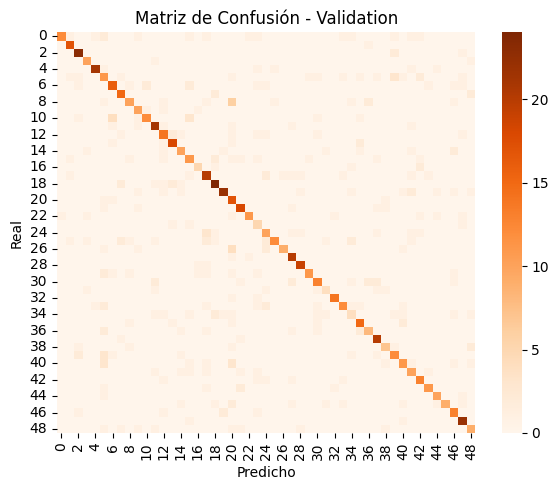

In [ ]:
x_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
x_val = np.load("data/X_val.npy")
y_val = np.load("data/y_val.npy")

def build_model_m2():
    return nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 49)
    )

m2 = NeuralNetworkPytorch(
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    architecture_fn=build_model_m2,
    learning_rate=0.001,
    lambda_l2=0.001,
    epochs=200,
    batch_size=32
)

m2.train()
m2.report_final_metrics(x_val, y_val, set_name="Validation")



In [ ]:
x_train = np.load("data/X_train.npy").astype(np.float32)
y_train = np.load("data/y_train.npy").astype(np.int64)
x_val = np.load("data/X_val.npy").astype(np.float32)
y_val = np.load("data/y_val.npy").astype(np.int64)

# Arquitecturas a evaluar
architectures = [
    [64],
    [128],
    [256],
    [512],
    [1024],
    [128, 64],
    [256, 128],
    [512, 256],
    [1024, 512],
    [128, 64, 32],
    [300,150,60],
    [256, 128, 64],
    [512, 256, 128],
    [1024, 512, 256]
]

lr_init = 0.001
epochs = 200
batch_size = 32
lambda_l2 = 0.001

resultados = []

for arch in architectures:
    print(f"\nEvaluando arquitectura: {[784] + arch + [49]}")

    def build_model_m3():
        layers = []
        input_dim = 784
        for hidden_dim in arch:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, 49))
        return nn.Sequential(*layers)
    
    model = NeuralNetworkPytorch(
        x_train=x_train,
        y_train=y_train,
        x_val=x_val,
        y_val=y_val,
        architecture_fn=build_model_m3,
        learning_rate=lr_init,
        lambda_l2=lambda_l2,
        epochs=epochs,
        batch_size=batch_size
    )

    model.train()

    val_loss = model._evaluate_val_loss()
    resultados.append({
        "architecture": [784] + arch + [49],
        "val_loss": round(val_loss, 4),
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="val_loss")
print("\nTop arquitecturas:")
print(df_resultados.head())



Evaluando arquitectura: [784, 64, 49]
Epoch 1 | Train Loss: 2.6109 | Val Loss: 2.8229 | Train Acc: 0.3803 | Val Acc: 0.3080
Epoch 51 | Train Loss: 0.1114 | Val Loss: 1.8773 | Train Acc: 0.9973 | Val Acc: 0.5650
Epoch 101 | Train Loss: 0.0782 | Val Loss: 1.8686 | Train Acc: 0.9997 | Val Acc: 0.5930
Epoch 151 | Train Loss: 0.0696 | Val Loss: 1.7899 | Train Acc: 1.0000 | Val Acc: 0.5960
Epoch 200 | Train Loss: 0.0674 | Val Loss: 1.7672 | Train Acc: 1.0000 | Val Acc: 0.6120

Evaluando arquitectura: [784, 128, 49]
Epoch 1 | Train Loss: 2.1649 | Val Loss: 2.4120 | Train Acc: 0.4967 | Val Acc: 0.4230
Epoch 51 | Train Loss: 0.0711 | Val Loss: 1.6074 | Train Acc: 1.0000 | Val Acc: 0.6400
Epoch 101 | Train Loss: 0.0628 | Val Loss: 1.5675 | Train Acc: 0.9983 | Val Acc: 0.6500
Epoch 151 | Train Loss: 0.0887 | Val Loss: 1.6156 | Train Acc: 0.9940 | Val Acc: 0.6360
Epoch 200 | Train Loss: 0.0544 | Val Loss: 1.4931 | Train Acc: 1.0000 | Val Acc: 0.6590

Evaluando arquitectura: [784, 256, 49]
Epoch 1

In [ ]:
x_train = np.load("data/X_train.npy").astype(np.float32)
y_train = np.load("data/y_train.npy").astype(np.int64)
x_val = np.load("data/X_val.npy").astype(np.float32)
y_val = np.load("data/y_val.npy").astype(np.int64)


architectures = [
    [2048, 1024, 512],
    [1024, 1024, 1024, 512, 256],
    [2048, 2048, 1024, 512, 256],
]

lr_init = 0.001
epochs = 200
batch_size = 32
lambda_l2 = 0  

resultados = []

for arch in architectures:
    print(f"\nEvaluando arquitectura (posible overfitting): {[784] + arch + [49]}")

    def build_model_m4():
        layers = []
        input_dim = 784
        for hidden_dim in arch:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            input_dim = hidden_dim
        layers.append(nn.Linear(input_dim, 49))
        return nn.Sequential(*layers)

    model = NeuralNetworkPytorch(
        x_train=x_train,
        y_train=y_train,
        x_val=x_val,
        y_val=y_val,
        architecture_fn=build_model,
        learning_rate=lr_init,
        lambda_l2=lambda_l2,
        epochs=epochs,
        batch_size=batch_size
    )

    model.train()

    train_loss, val_loss = model.last_train_val_losses
    resultados.append({
        "architecture": [784] + arch + [49],
        "train_loss": round(train_loss, 4),
        "val_loss": round(val_loss, 4),
        "overfit_score": round(val_loss - train_loss, 4),
    })


df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by="overfit_score", ascending=False)
print("\nTop arquitecturas con overfitting:")
print(df_resultados.head())


Evaluando arquitectura (posible overfitting): [784, 2048, 1024, 512, 49]
Epoch 1 | Train Loss: 1.2938 | Val Loss: 1.8425 | Train Acc: 0.6637 | Val Acc: 0.5150
Epoch 51 | Train Loss: 0.0000 | Val Loss: 2.0598 | Train Acc: 1.0000 | Val Acc: 0.6960
Epoch 101 | Train Loss: 0.0000 | Val Loss: 3.2725 | Train Acc: 1.0000 | Val Acc: 0.7030
Epoch 151 | Train Loss: 0.0000 | Val Loss: 3.5973 | Train Acc: 1.0000 | Val Acc: 0.7030
Epoch 200 | Train Loss: 0.0000 | Val Loss: 3.2826 | Train Acc: 1.0000 | Val Acc: 0.7070

Evaluando arquitectura (posible overfitting): [784, 1024, 1024, 1024, 512, 256, 49]
Epoch 1 | Train Loss: 1.5931 | Val Loss: 1.9791 | Train Acc: 0.5800 | Val Acc: 0.4760
Epoch 51 | Train Loss: 0.0142 | Val Loss: 2.1755 | Train Acc: 0.9963 | Val Acc: 0.6600
Epoch 101 | Train Loss: 0.0000 | Val Loss: 3.4474 | Train Acc: 1.0000 | Val Acc: 0.6720
Epoch 151 | Train Loss: 0.0000 | Val Loss: 4.0181 | Train Acc: 1.0000 | Val Acc: 0.6730
Epoch 200 | Train Loss: 0.0000 | Val Loss: 4.6719 | Tra


Métricas finales para Test:
Accuracy: 0.5780
Cross-Entropy Loss: 1.7355
Matriz de Confusión (Test):


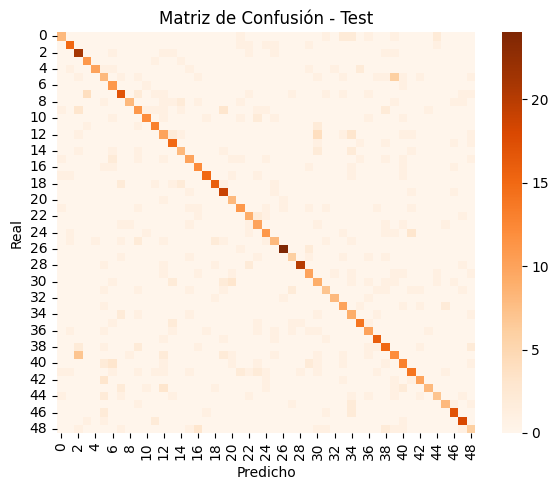

In [ ]:
x_test = np.load("data/X_test.npy").astype(np.float32)
y_test = np.load("data/y_test.npy").astype(np.int64)

m0.report_final_metrics(x_test, y_test, set_name="Test")


Época 1/200 - lr: 0.00100 - Train Loss: 2.4271 - Val Loss: 2.6547 - Val Acc: 0.3450
Época 101/200 - lr: 0.00100 - Train Loss: 0.0217 - Val Loss: 1.6355 - Val Acc: 0.6520
Época 200/200 - lr: 0.00100 - Train Loss: 0.0164 - Val Loss: 1.6321 - Val Acc: 0.6620

Métricas finales para Test:
Accuracy: 0.6530
Cross-Entropy Loss: 1.7047
Matriz de Confusión (Test):


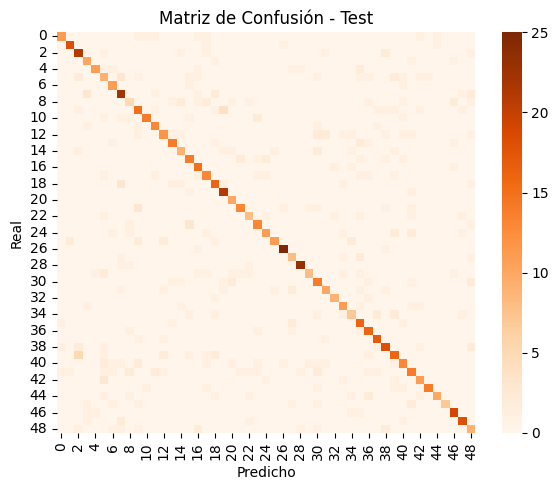

In [ ]:
m1 = NeuralNetwork()
x_train = np.load("data/X_train.npy").astype(np.float32)
y_train = np.load("data/y_train.npy").astype(np.int64)
x_val = np.load("data/X_val.npy").astype(np.float32)
y_val = np.load("data/y_val.npy").astype(np.int64)
x_test = np.load("data/X_test.npy").astype(np.float32)
y_test = np.load("data/y_test.npy").astype(np.int64)

m1.train_model(
    x_train, y_train, x_val, y_val,
    layer_sizes=[784, 128, 64, 49],
    epochs=200,
    lr_init=0.001,
    lr_min=0.0001,
    use_lr_decay=False,
    decay_type="linear",
    use_l2=True,
    lambda_l2=0.001,
    use_early_stopping=False,
    batch_size=32,
    use_adam=True
)

m1.report_final_metrics(x_test, y_test, set_name="Test")


Métricas finales para Test:
Accuracy: 0.6590
Cross-Entropy Loss: 1.6415
Matriz de Confusión (Test):


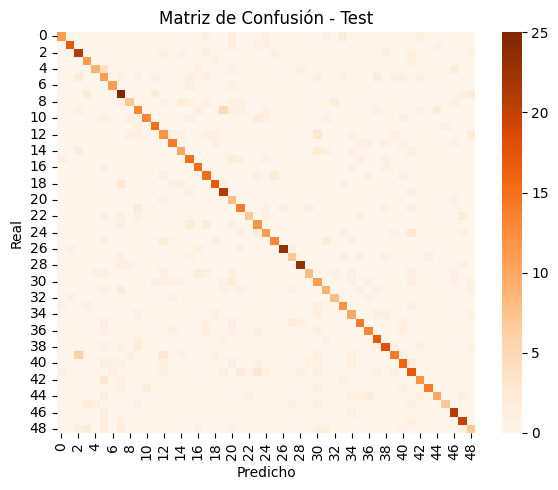

In [18]:
m2.report_final_metrics(x_test, y_test, set_name="Test")

Epoch 1 | Train Loss: 1.5112 | Val Loss: 1.9496 | Train Acc: 0.6493 | Val Acc: 0.5240
Epoch 51 | Train Loss: 0.0681 | Val Loss: 1.4220 | Train Acc: 0.9980 | Val Acc: 0.6550
Epoch 101 | Train Loss: 0.0681 | Val Loss: 1.3538 | Train Acc: 0.9990 | Val Acc: 0.6740
Epoch 151 | Train Loss: 0.0399 | Val Loss: 1.3084 | Train Acc: 1.0000 | Val Acc: 0.6810
Epoch 200 | Train Loss: 0.0511 | Val Loss: 1.3145 | Train Acc: 1.0000 | Val Acc: 0.6770

Métricas finales para Test:
Accuracy: 0.6890
Cross-Entropy Loss: 1.2861
Matriz de Confusión (Test):


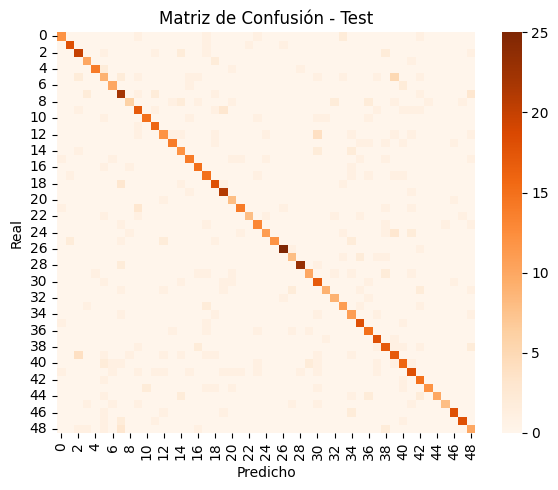

In [ ]:
arch = [512]
x_train = np.load("data/X_train.npy").astype(np.float32)
y_train = np.load("data/y_train.npy").astype(np.int64)
x_val = np.load("data/X_val.npy").astype(np.float32)
y_val = np.load("data/y_val.npy").astype(np.int64)
x_test = np.load("data/X_test.npy").astype(np.float32)
y_test = np.load("data/y_test.npy").astype(np.int64)

def build_model_m3():
    layers = []
    input_dim = 784
    for hidden_dim in arch:
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        input_dim = hidden_dim
    layers.append(nn.Linear(input_dim, 49))
    return nn.Sequential(*layers)

m3  = NeuralNetworkPytorch(
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    architecture_fn=build_model_m3,
    learning_rate=0.001,
    lambda_l2=0.001,
    epochs=200,
    batch_size=32
)

m3.train()
m3.report_final_metrics(x_train, y_train, set_name="Train")
m3.report_final_metrics(x_val, y_val, set_name="Validation")

m3.report_final_metrics(x_test, y_test, set_name="Test")


Epoch 1 | Train Loss: 1.6996 | Val Loss: 2.0748 | Train Acc: 0.5500 | Val Acc: 0.4460
Epoch 51 | Train Loss: 0.0691 | Val Loss: 2.1432 | Train Acc: 0.9857 | Val Acc: 0.6450
Epoch 101 | Train Loss: 0.0000 | Val Loss: 2.3646 | Train Acc: 1.0000 | Val Acc: 0.6760
Epoch 151 | Train Loss: 0.0000 | Val Loss: 3.4275 | Train Acc: 1.0000 | Val Acc: 0.6680
Epoch 200 | Train Loss: 0.3331 | Val Loss: 2.6598 | Train Acc: 0.9347 | Val Acc: 0.6060

Métricas finales para Test:
Accuracy: 0.5930
Cross-Entropy Loss: 2.8300
Matriz de Confusión (Test):


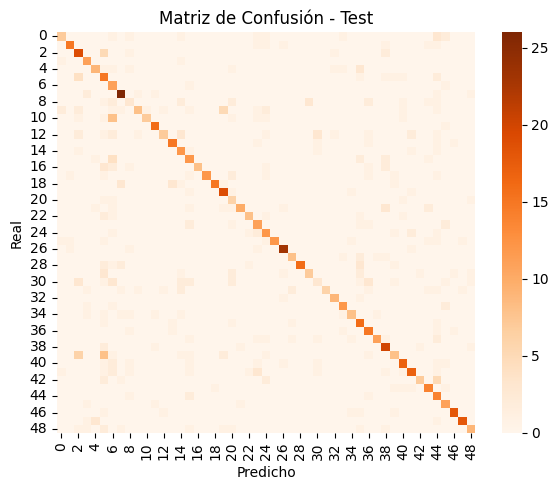

In [ ]:
arch = [1024, 1024, 1024, 512, 256]

m4  = NeuralNetworkPytorch(
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    architecture_fn=build_model_m4,
    learning_rate=0.001,
    lambda_l2=0,
    epochs=200,
    batch_size=32
)

m4.train()
m4.report_final_metrics(x_test, y_test, set_name="Test")

In [ ]:


X_comp = np.load("data/X_COMP.npy").astype(np.float32)


probs, _ = m3.forward(X_comp)


columnas = [f"Clase_{i}" for i in range(probs.shape[1])]


df_predicciones = pd.DataFrame(probs, columns=columnas)


df_predicciones.to_csv("Amblard_Agustin_predicciones.csv", index=False)


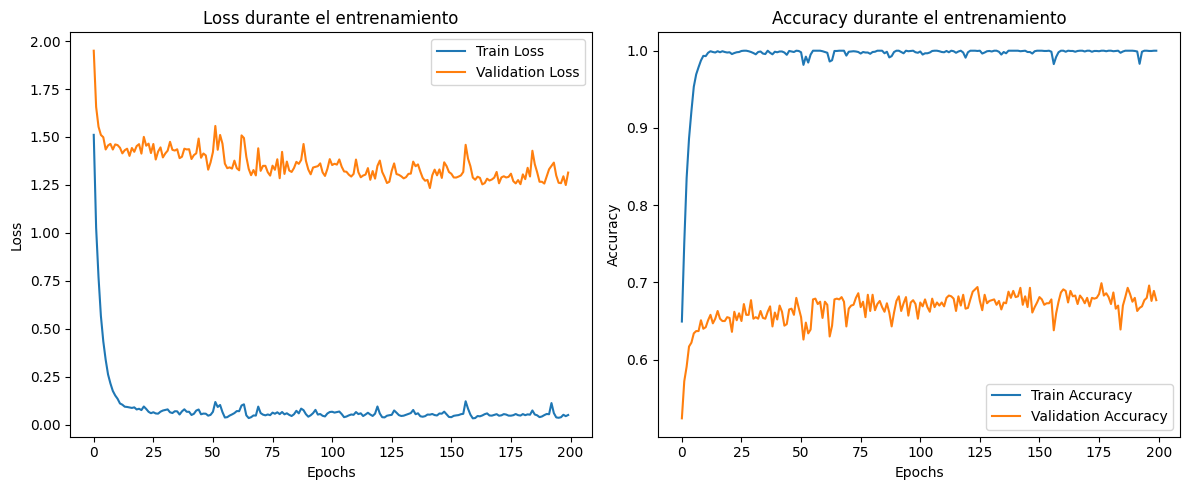

In [8]:




#graficar curvas de loss y accuracy para m3
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(m3.history["train_loss"], label="Train Loss")
plt.plot(m3.history["val_loss"], label="Validation Loss")
plt.title("Loss durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(m3.history["train_acc"], label="Train Accuracy")
plt.plot(m3.history["val_acc"], label="Validation Accuracy")
plt.title("Accuracy durante el entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
